In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import json

## Lets load the data


In [2]:
loaddata = pd.read_csv("../Accident_Stats/US_Accidents_Dec21_updated.csv")

In [3]:
loaddata.head()   #see datat and start looking to filter out data

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [4]:
loaddata.shape

(2845342, 47)

In [5]:
print(np.unique(loaddata['Severity']))
# this data will be our predictive column... lets just confirm we have some severity levels defined.

[1 2 3 4]


# lets find some missing data.. which columns
## then we'll seperate and clean up the initial missing data stats

In [6]:
missing_data = loaddata.isna().sum().sort_values(ascending=False)
missing_data[missing_data !=0]

Number                   1743911
Precipitation(in)         549458
Wind_Chill(F)             469643
Wind_Speed(mph)           157944
Wind_Direction             73775
Humidity(%)                73092
Weather_Condition          70636
Visibility(mi)             70546
Temperature(F)             69274
Pressure(in)               59200
Weather_Timestamp          50736
Airport_Code                9549
Timezone                    3659
Nautical_Twilight           2867
Civil_Twilight              2867
Sunrise_Sunset              2867
Astronomical_Twilight       2867
Zipcode                     1319
City                         137
Street                         2
dtype: int64

In [7]:
#Experimenting with some single line code to test same function as above
md = [feature for feature in loaddata.columns if loaddata[feature].isnull().sum()>1]

for feature in md:
    print(feature, np.round(loaddata[feature].isnull().mean(), 4), '% missing values')

Number 0.6129 % missing values
Street 0.0 % missing values
City 0.0 % missing values
Zipcode 0.0005 % missing values
Timezone 0.0013 % missing values
Airport_Code 0.0034 % missing values
Weather_Timestamp 0.0178 % missing values
Temperature(F) 0.0243 % missing values
Wind_Chill(F) 0.1651 % missing values
Humidity(%) 0.0257 % missing values
Pressure(in) 0.0208 % missing values
Visibility(mi) 0.0248 % missing values
Wind_Direction 0.0259 % missing values
Wind_Speed(mph) 0.0555 % missing values
Precipitation(in) 0.1931 % missing values
Weather_Condition 0.0248 % missing values
Sunrise_Sunset 0.001 % missing values
Civil_Twilight 0.001 % missing values
Nautical_Twilight 0.001 % missing values
Astronomical_Twilight 0.001 % missing values


# Lets determine: What percentage of our data is missing?

# Missing data can be dropped or nulled, or filled with averages, means, or coverted to binary numbers, true/false 

In [8]:
percentage_missing = missing_data[missing_data!=0] / len(loaddata) * 100
percentage_missing
#Lets take a look

Number                   61.290031
Precipitation(in)        19.310789
Wind_Chill(F)            16.505678
Wind_Speed(mph)           5.550967
Wind_Direction            2.592834
Humidity(%)               2.568830
Weather_Condition         2.482514
Visibility(mi)            2.479350
Temperature(F)            2.434646
Pressure(in)              2.080593
Weather_Timestamp         1.783125
Airport_Code              0.335601
Timezone                  0.128596
Nautical_Twilight         0.100761
Civil_Twilight            0.100761
Sunrise_Sunset            0.100761
Astronomical_Twilight     0.100761
Zipcode                   0.046356
City                      0.004815
Street                    0.000070
dtype: float64

# Lets check hightest occurances of accidents based on cities

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'CA'),
  Text(1, 0, 'FL'),
  Text(2, 0, 'TX'),
  Text(3, 0, 'OR'),
  Text(4, 0, 'VA'),
  Text(5, 0, 'NY'),
  Text(6, 0, 'PA'),
  Text(7, 0, 'MN'),
  Text(8, 0, 'NC'),
  Text(9, 0, 'SC'),
  Text(10, 0, 'MD'),
  Text(11, 0, 'AZ'),
  Text(12, 0, 'NJ'),
  Text(13, 0, 'TN'),
  Text(14, 0, 'UT'),
  Text(15, 0, 'LA'),
  Text(16, 0, 'IL'),
  Text(17, 0, 'MI'),
  Text(18, 0, 'GA'),
  Text(19, 0, 'WA')])

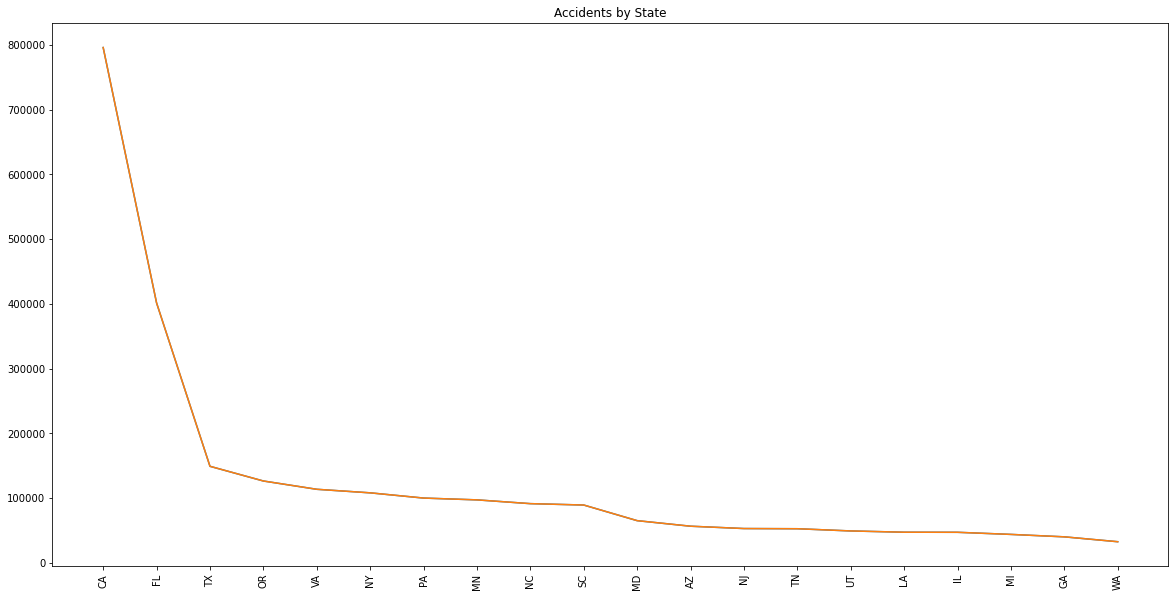

In [9]:
fltr_by_state = loaddata["State"].value_counts()
x = fltr_by_state.index[:20]
y = fltr_by_state.values[:20]
plt.plot(x, y)
fltr_by_state[:20].plot(figsize=(20,10))
plt.gca()
plt.title("Accidents by State")
plt.xticks(rotation=90)

In [10]:
#focusing out data to the top 20 
acc_by_city = loaddata['City'].value_counts()
acc_by_city[:20]

Miami           106966
Los Angeles      68956
Orlando          54691
Dallas           41979
Houston          39448
Charlotte        33152
Sacramento       32559
San Diego        26627
Raleigh          22840
Minneapolis      22768
Portland         20944
Nashville        20267
Austin           18301
Baton Rouge      18182
Phoenix          17143
Saint Paul       16869
New Orleans      16251
Atlanta          15622
Jacksonville     14967
Richmond         14349
Name: City, dtype: int64

[]

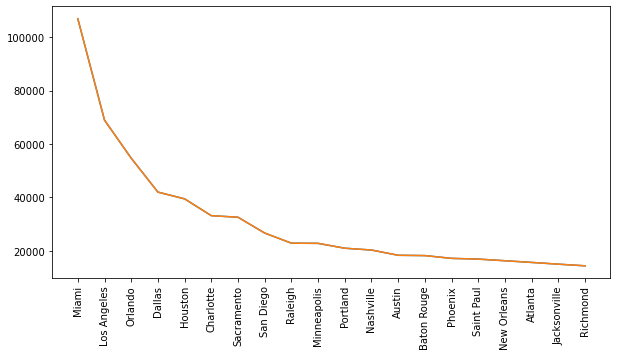

In [11]:
x = acc_by_city[:20].index
y = acc_by_city[:20].values
plt.plot(x, y)
acc_by_city[:20].plot(figsize=(10,5))
plt.gca()
plt.xticks(rotation=90)
plt.plot(figsize=(10,5))

In [12]:
loaddata[["Start_Time"]].describe() # taking a look at time based data

,Start_Time
count,2845342
unique,1959333
top,2021-01-26 16:16:13
freq,214


# General Hypothesis:  Determine what hours are common to high probability accidents

## We'll convert our data to a format we can use, then convert the data to 24 HR format, sort it, then graph the data to visually see results

In [13]:
ld_Start_Time = pd.to_datetime(loaddata['Start_Time'])
type(ld_Start_Time)
ld_hour = ld_Start_Time.dt.hour
ld_hours_total = ld_hour.value_counts()
ld_hours_total = ld_hours_total.sort_index()

Text(0.5, 1.0, 'Accident Hours')

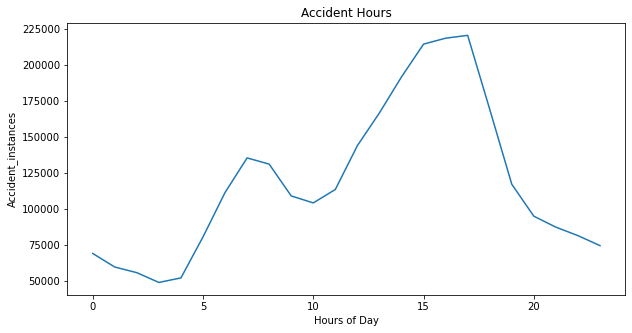

In [14]:
ld_hours_total.plot(figsize=(10,5))
plt.xlabel("Hours of Day")
plt.ylabel("Accident_instances")
plt.title("Accident Hours")

# Zoom into first Apex between HRS 3-9

Text(0.5, 1.0, 'Accident Hours between 3pm -6pm')

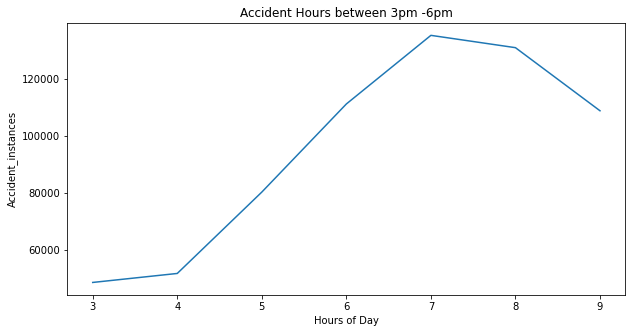

In [15]:
ld_hours_total[3:10].plot(figsize=(10,5))
plt.xlabel("Hours of Day")
plt.ylabel("Accident_instances")
plt.title("Accident Hours between 3pm -6pm")

# Zoom into HRS between 3pm-6pm

Text(0.5, 1.0, 'Accident Hours between 3pm -6pm')

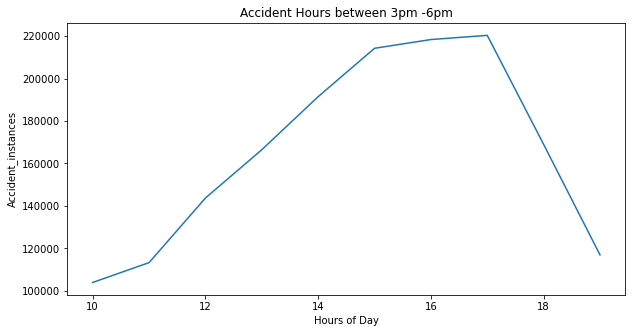

In [16]:
ld_hours_total[10:20].plot(figsize=(10,5))
plt.xlabel("Hours of Day")
plt.ylabel("Accident_instances")
plt.title("Accident Hours between 3pm -6pm")

# What day of the month is the most for accidents to occur
## Since the 31st day is a variable between each month the lowest occurrance should be on this day... Lets verify:

<AxesSubplot:>

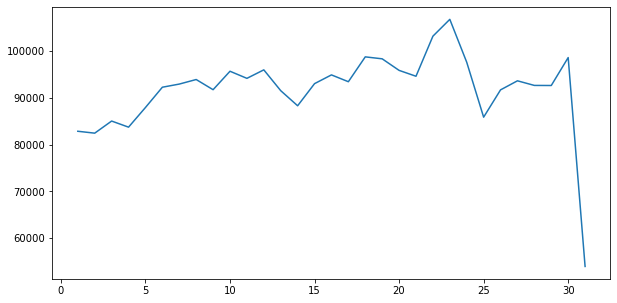

In [17]:
ld_Start_Time_day = ld_Start_Time.dt.day.sort_index()
ld_Start_Time_day.value_counts().sort_index().plot(figsize=(10,5))

# We have common hours of daily accidents, lets dig deeper to determine other factors of these accidents.  Let's review weather conditions.

In [18]:
wed_con = loaddata['Weather_Condition'].value_counts()
print(wed_con[:20])  #list the top 20 
print(wed_con[-20:]) #list the lowest 20

Fair                       1107194
Mostly Cloudy               363959
Cloudy                      348767
Partly Cloudy               249939
Clear                       173823
Light Rain                  128403
Overcast                     84882
Scattered Clouds             45132
Light Snow                   43752
Fog                          41226
Haze                         36354
Rain                         31044
Fair / Windy                 15195
Heavy Rain                   11824
Smoke                         7200
Light Drizzle                 7041
Thunder in the Vicinity       6944
Cloudy / Windy                6839
T-Storm                       6546
Mostly Cloudy / Windy         6297
Name: Weather_Condition, dtype: int64
Snow and Thunder / Windy               2
Freezing Rain / Windy                  2
Funnel Cloud                           2
Heavy Ice Pellets                      2
Sand / Dust Whirlwinds / Windy         1
Drifting Snow                          1
Heavy Thundersto

In [19]:
# Printout a chart of top 20 Weather Conditions observed in an accident
print(type(wed_con))
#wed_con = pd.DataFrame(wed_con[:20])
wed_con = wed_con[:10]
print(wed_con.index)
print(wed_con.values)

<class 'pandas.core.series.Series'>
Index(['Fair', 'Mostly Cloudy', 'Cloudy', 'Partly Cloudy', 'Clear',
       'Light Rain', 'Overcast', 'Scattered Clouds', 'Light Snow', 'Fog'],
      dtype='object')
[1107194  363959  348767  249939  173823  128403   84882   45132   43752
   41226]


<AxesSubplot:title={'center':'Top 20 Accident Conditions based on Weather'}, xlabel='Occurrances', ylabel='Weather Conditions During Accidents'>

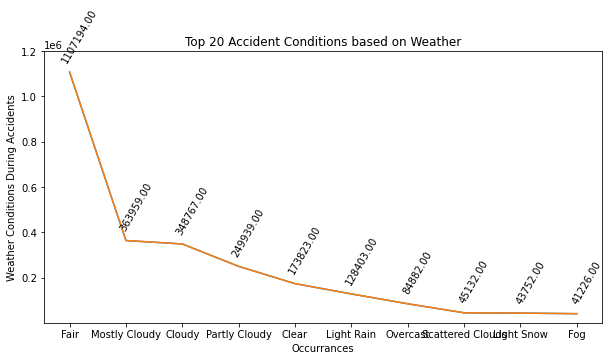

In [20]:
plt.plot(wed_con.index, np.array(wed_con.values).tolist())

plt.axis(ymin=1000, ymax=1200000)
plt.xlabel("Occurrances", fontsize=10)
plt.ylabel("Weather Conditions During Accidents",fontsize=10)
plt.title("Top 20 Accident Conditions based on Weather")
plt.xticks(rotation=90)

for x,y in zip(wed_con.index,np.array(wed_con.values).tolist()):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(10,10), # distance from text to points (x,y)
                 ha='center',  # horizontal alignment can be left, right or center
                 rotation=60)  # rotate text 60 degrees

wed_con.plot(figsize=(10,5))


### Removing data that doesnt provide us information on accidents, these columns will be removed to clean up the data for further processing

In [21]:
loaddata.drop(loaddata[['End_Lat','End_Lng','Amenity','Traffic_Calming']], axis=1, inplace=True)

In [22]:
loaddata.shape


(2845342, 43)

In [23]:
#20 Safest Cities per accidents
import numpy as np
loaddata.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Distance(mi)', 'Description', 'Number', 'Street', 'Side', 'City',
       'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

# Find accidents based on "WIND direction"

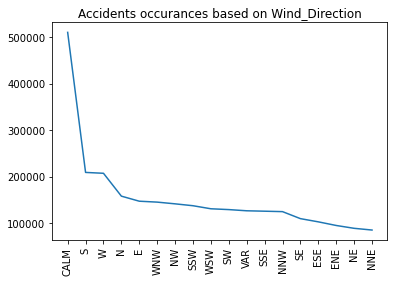

In [24]:
# Lets clear out the bad data, synch up names, and directions to LETTER descriptions
loaddata['Wind_Direction']=loaddata['Wind_Direction'].replace(['Calm'],['CALM'])
loaddata['Wind_Direction']=loaddata['Wind_Direction'].replace(['West'],['W'])
loaddata['Wind_Direction']=loaddata['Wind_Direction'].replace(['South'],['S'])
loaddata['Wind_Direction']=loaddata['Wind_Direction'].replace(['North'],['N'])
loaddata['Wind_Direction']=loaddata['Wind_Direction'].replace(['East'],['E'])
loaddata['Wind_Direction']=loaddata['Wind_Direction'].replace(['Variable'],['VAR'])

windir = loaddata["Wind_Direction"].value_counts()
#print(windir)  used for cleaning up the data

plt.gca()
plt.title("Accidents occurances based on Wind_Direction")
plt.xticks(rotation=90)
plt.plot(windir)

# Using City and state lets find out safest state, then safest city 

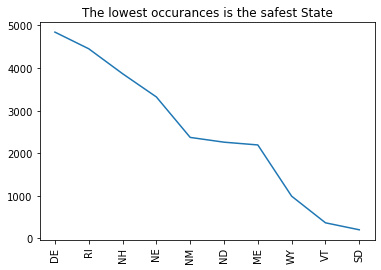

In [25]:
safest_state = loaddata["State"].value_counts()
plt.gca()
plt.xticks(rotation=90)
plt.title("The lowest occurances is the safest State")
plt.plot(safest_state[-10:].index, safest_state[-10:].values)


In [26]:
# using the above data, lets find the safest towns, cities with results = 1
safestcity_SD = loaddata['State']=='SD'
safestcity_SD_city = loaddata.loc[safestcity_SD]['City'].value_counts() 

print("Safest Cites in SD: _with accidents equal to 1_")
print(np.array([sdsd for sdsd in safestcity_SD_city.index if safestcity_SD_city[sdsd]==1]).reshape(2,14))

Safest Cites in SD: _with accidents equal to 1_
[['Lemmon' 'Okaton' 'Spencer' 'Selby' 'Wasta' 'Newell' 'Lake Andes'
  'Piedmont' 'Vivian' 'Hill City' 'White River' 'Brandon' 'Salem'
  'Fairfax']
 ['Hurley' 'Belle Fourche' 'Batesland' 'Bridgewater' 'Jefferson'
  'Iroquois' 'Springfield' 'Geddes' 'Montrose' 'Valley Springs' 'Wolsey'
  'Hartford' 'Burbank' 'Arlington']]


In [27]:
safestcity_VT = loaddata['State']=='VT'
safestcity_VT_city = loaddata.loc[safestcity_VT]['City'].value_counts()
#print(safestcity_VT_city)   #taking the last 10 as they have the lowest counts 

print("Safest Cites in VT: _with accidents equal to 1_")
print(np.array([sdvt for sdvt in safestcity_VT_city.index if safestcity_VT_city[sdvt]==1]).reshape(3,13))

Safest Cites in VT: _with accidents equal to 1_
[['Guilford' 'Essex Junction' 'Northfield' 'Barnet' 'Cabot' 'Franklin'
  'Randolph Center' 'Lowell' 'Ferrisburgh' 'North Clarendon'
  'Stockbridge' 'Bellows Falls' 'Castleton']
 ['Woodstock' 'North Hero' 'Stowe' 'Bristol' 'Wolcott' 'Hyde Park'
  'West Charleston' 'Underhill' 'Concord' 'Cuttingsville' 'Richford'
  'Ascutney' 'West Dover']
 ['North Pownal' 'Derby' 'Vernon' 'Canaan' 'Jeffersonville' 'Irasburg'
  'Peru' 'North Ferrisburgh' 'East Dorset' 'Highgate Center'
  'Manchester Center' 'Bridgewater Corners' 'Plainfield']]


In [28]:
safestcity_WY = loaddata['State']=='WY'
safestcity_WY_city = loaddata.loc[safestcity_WY]['City'].value_counts()
#print(safestcity_WY_city)   #taking the last 10 as they have the lowest counts

print("Safest Cites in WY: _with accidents equal to 1_")
print([sdwy for sdwy in safestcity_WY_city.index if safestcity_WY_city[sdwy]==1])

Safest Cites in WY: _with accidents equal to 1_
['Shell', 'Midwest', 'Lusk', 'Lingle', 'Ranchester', 'Kemmerer', 'Worland', 'Basin', 'Bondurant', 'Beulah', 'Daniel', 'Saratoga', 'Boulder', 'Alcova', 'Buford', 'Tie Siding']


# Lets map the entire US for accidents and plot it. 
## Hypothesis:  Highly dense populations, & freeways should be a factor in accident occurances.

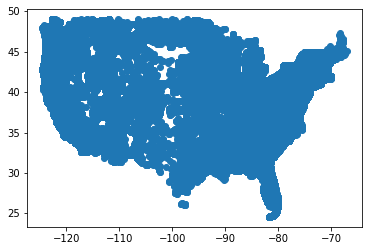

In [29]:
#plotting lat and long for data visualization
fltrUS = loaddata['Country'] == 'US'
plt.scatter(x=loaddata.loc[fltrUS]['Start_Lng'],y=loaddata.loc[fltrUS]['Start_Lat'])
plt.rcParams["figure.figsize"] = (50,35)
plt.show()  

# Data Exploration Conclusion:  
Most accidents occur during 05am-08am, and between 3pm-5pm, during commuter hrs.
20 most dangerous cities for accidents are in highly populated regions of the US.
20 safest cities will be noted at the bottom, listed by top 3 STATES with lowest occurance of accidents.
Weather wise... the highest occurrances of accidents were on fair weather days, with no winds (calm).

In [30]:
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title('Correlation Matrix, fontsize=15')
    plt.show()


/tmp/ipykernel_225812/1254954468.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns') # drop columns with NaN


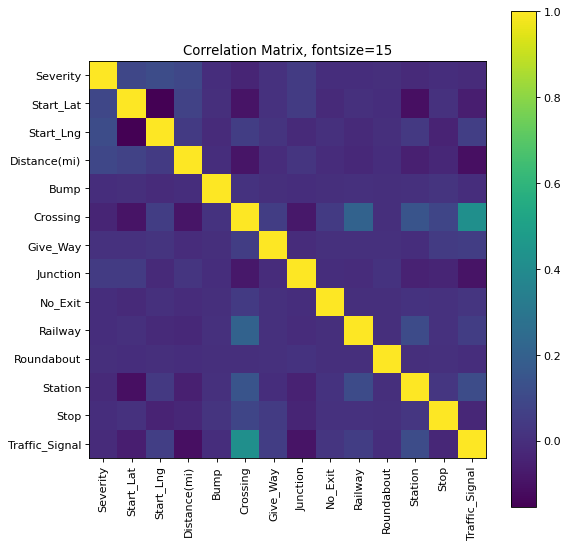

In [32]:
plotCorrelationMatrix(loaddata, 8)


# Moving on to further analysis of US Accidents lets dig further into the data, and create a model for predictive testing


# Clean up this data... drop some feilds we dont think are useful

In [33]:
loaddata.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Distance(mi)', 'Description', 'Number', 'Street', 'Side', 'City',
       'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

# Revisiting Missing Data... lets see what we have based on our new DataFrame

In [34]:
#some data will contain no data... we should drop those rows

loaddata.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Bump                           0
Crossing                       0
Give_Way  

In [36]:
#need to drop distance, description and number as they will not fit our predictive model
#labels with text are not useful
loaddata.drop(loaddata[['Distance(mi)','Description','Number']], axis=1, inplace=True)
loaddata.drop(loaddata[['Start_Time','End_Time','Start_Lat','Start_Lng','City','State','Country']], axis=1, inplace=True)
loaddata.drop(loaddata[['Zipcode','TimeZone','Airport_Code','Weather_Timestamp']], axis=1, inplace=True)
loaddata.columns

KeyError: "None of [Index(['Distance(mi)', 'Description', 'Number'], dtype='object')] are in the [columns]"

In [37]:
loaddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 33 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Street                 object 
 3   Side                   object 
 4   County                 object 
 5   Zipcode                object 
 6   Timezone               object 
 7   Airport_Code           object 
 8   Weather_Timestamp      object 
 9   Temperature(F)         float64
 10  Wind_Chill(F)          float64
 11  Humidity(%)            float64
 12  Pressure(in)           float64
 13  Visibility(mi)         float64
 14  Wind_Direction         object 
 15  Wind_Speed(mph)        float64
 16  Precipitation(in)      float64
 17  Weather_Condition      object 
 18  Bump                   bool   
 19  Crossing               bool   
 20  Give_Way               bool   
 21  Junction               bool   
 22  No_Exit           

In [38]:
loaddata.drop(loaddata[['Street','Side','County','Zipcode','Airport_Code','Weather_Timestamp']], axis=1, inplace=True)
loaddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 27 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Timezone               object 
 3   Temperature(F)         float64
 4   Wind_Chill(F)          float64
 5   Humidity(%)            float64
 6   Pressure(in)           float64
 7   Visibility(mi)         float64
 8   Wind_Direction         object 
 9   Wind_Speed(mph)        float64
 10  Precipitation(in)      float64
 11  Weather_Condition      object 
 12  Bump                   bool   
 13  Crossing               bool   
 14  Give_Way               bool   
 15  Junction               bool   
 16  No_Exit                bool   
 17  Railway                bool   
 18  Roundabout             bool   
 19  Station                bool   
 20  Stop                   bool   
 21  Traffic_Signal         bool   
 22  Turning_Loop      

In [40]:
loaddata.isnull().sum()

ID                            0
Severity                      0
Timezone                   3659
Temperature(F)            69274
Wind_Chill(F)            469643
Humidity(%)               73092
Pressure(in)              59200
Visibility(mi)            70546
Wind_Direction            73775
Wind_Speed(mph)          157944
Precipitation(in)        549458
Weather_Condition         70636
Bump                          0
Crossing                      0
Give_Way                      0
Junction                      0
No_Exit                       0
Railway                       0
Roundabout                    0
Station                       0
Stop                          0
Traffic_Signal                0
Turning_Loop                  0
Sunrise_Sunset             2867
Civil_Twilight             2867
Nautical_Twilight          2867
Astronomical_Twilight      2867
dtype: int64

In [42]:
loaddata.drop(loaddata[['Timezone']], axis=1, inplace=True)

# Finally Zero Nans... we are good to now convert the rest of the data and prep for Predictive models


In [44]:
#determine the mean, and lets fill the missing data with the mean
pmean = loaddata['Pressure(in)'].mean()
tmean = loaddata['Temperature(F)'].mean()
wcmean = loaddata['Wind_Chill(F)'].mean()
hmean = loaddata['Humidity(%)'].mean()
wsmean = loaddata['Wind_Speed(mph)'].mean()
prmean = loaddata['Precipitation(in)'].mean()

loaddata['Pressure(in)']=loaddata['Pressure(in)'].fillna(pmean)
loaddata['Temperature(F)']=loaddata['Temperature(F)'].fillna(tmean)
loaddata['Wind_Chill(F)']=loaddata['Wind_Chill(F)'].fillna(wcmean)
loaddata['Humidity(%)']=loaddata['Humidity(%)'].fillna(hmean)
loaddata['Wind_Speed(mph)']=loaddata['Wind_Speed(mph)'].fillna(wsmean)
loaddata['Precipitation(in)']=loaddata['Precipitation(in)'].fillna(prmean)

loaddata.isnull().sum()

ID                           0
Severity                     0
Temperature(F)               0
Wind_Chill(F)                0
Humidity(%)                  0
Pressure(in)                 0
Visibility(mi)           70546
Wind_Direction           73775
Wind_Speed(mph)              0
Precipitation(in)            0
Weather_Condition        70636
Bump                         0
Crossing                     0
Give_Way                     0
Junction                     0
No_Exit                      0
Railway                      0
Roundabout                   0
Station                      0
Stop                         0
Traffic_Signal               0
Turning_Loop                 0
Sunrise_Sunset            2867
Civil_Twilight            2867
Nautical_Twilight         2867
Astronomical_Twilight     2867
dtype: int64

In [46]:
loaddata['Visibility(mi)'] = loaddata['Visibility(mi)'].fillna(loaddata['Visibility(mi)'].mode()[0])
loaddata['Wind_Direction'] = loaddata['Wind_Direction'].fillna(loaddata['Wind_Direction'].mode()[0])
loaddata['Weather_Condition'] = loaddata['Weather_Condition'].fillna(loaddata['Weather_Condition'].mode()[0])

loaddata.isnull().sum()

ID                          0
Severity                    0
Temperature(F)              0
Wind_Chill(F)               0
Humidity(%)                 0
Pressure(in)                0
Visibility(mi)              0
Wind_Direction              0
Wind_Speed(mph)             0
Precipitation(in)           0
Weather_Condition           0
Bump                        0
Crossing                    0
Give_Way                    0
Junction                    0
No_Exit                     0
Railway                     0
Roundabout                  0
Station                     0
Stop                        0
Traffic_Signal              0
Turning_Loop                0
Sunrise_Sunset           2867
Civil_Twilight           2867
Nautical_Twilight        2867
Astronomical_Twilight    2867
dtype: int64

In [48]:
#drop 4 more columns
loaddata.drop(loaddata[['Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']], axis=1, inplace=True)

In [50]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
loaddata['Bump'] = label_encoder.fit_transform(loaddata['Bump'])
loaddata['Crossing'] = label_encoder.fit_transform(loaddata['Crossing'])
loaddata['Give_Way'] = label_encoder.fit_transform(loaddata['Give_Way'])
loaddata['Junction'] = label_encoder.fit_transform(loaddata['Junction'])
loaddata['No_Exit'] = label_encoder.fit_transform(loaddata['No_Exit'])
loaddata['Railway'] = label_encoder.fit_transform(loaddata['Railway'])
loaddata['Roundabout'] = label_encoder.fit_transform(loaddata['Roundabout'])
loaddata['Station'] = label_encoder.fit_transform(loaddata['Station'])
loaddata['Stop'] = label_encoder.fit_transform(loaddata['Stop'])
loaddata['Traffic_Signal'] = label_encoder.fit_transform(loaddata['Traffic_Signal'])
loaddata['Turning_Loop'] = label_encoder.fit_transform(loaddata['Turning_Loop'])
loaddata.head()


,ID,Severity,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),...,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Signal,Turning_Loop
0,A-1,3,42.1,36.100000,58.0,29.76,10.0,SW,10.400000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,A-2,2,36.9,59.658231,91.0,29.68,10.0,CALM,7.395044,0.020000,...,0,0,0,0,0,0,0,0,0,0
2,A-3,2,36.0,59.658231,97.0,29.70,10.0,CALM,7.395044,0.020000,...,0,0,1,0,0,0,0,0,0,0
3,A-4,2,39.0,59.658231,55.0,29.65,10.0,CALM,7.395044,0.007017,...,0,0,0,0,0,0,0,0,0,0
4,A-5,3,37.0,29.800000,93.0,29.69,10.0,WSW,10.400000,0.010000,...,0,0,0,0,0,0,0,0,0,0


In [52]:
loaddata['Weather_Condition'] = label_encoder.fit_transform(loaddata['Weather_Condition'])
loaddata['Wind_Direction'] = label_encoder.fit_transform(loaddata['Wind_Direction'])
loaddata.head()

,ID,Severity,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),...,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Signal,Turning_Loop
0,A-1,3,42.1,36.100000,58.0,29.76,10.0,13,10.400000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,A-2,2,36.9,59.658231,91.0,29.68,10.0,0,7.395044,0.020000,...,0,0,0,0,0,0,0,0,0,0
2,A-3,2,36.0,59.658231,97.0,29.70,10.0,0,7.395044,0.020000,...,0,0,1,0,0,0,0,0,0,0
3,A-4,2,39.0,59.658231,55.0,29.65,10.0,0,7.395044,0.007017,...,0,0,0,0,0,0,0,0,0,0
4,A-5,3,37.0,29.800000,93.0,29.69,10.0,17,10.400000,0.010000,...,0,0,0,0,0,0,0,0,0,0


# Export the processed Data

In [1]:
loaddata.to_csv('processed_USAccidents.csv')

NameError: name 'loaddata' is not defined

In [57]:
loaddata = loaddata.drop(['ID'], axis=1)
y = loaddata['Severity']
X = loaddata.drop(['Severity'], axis=1)


# Severity will be our expected "result"
## All other columns will be used to train the data


In [ ]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)
pca.fit(X)
train_img = pca.transform(X)
train = pd.DataFrame(train_img)
train.head()

In [ ]:
train.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, Y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
transform = scaler.transform(X_train)
#test_img = scaler.transform(test_img)
scalar_train = pd.DataFrame(transform)
scalar_train.head()

# We have values... time to set models and test which model will be appropiate for this dataset


## Linear Regression

from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

print("Training score", reg.score(X_train,y_train))
print("Testing score:", reg.score(X_test,y_test))

### RESULTS:
### Training score 0.05664993014366282
### Testing score: 0.05675485759552412

# MLPClassifier 

from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=15, alpha=0.0001,
                     solver='sgd', verbose=10, random_state=21, tol=0.000000001)

clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

clf.score(X_test, y_pred)   #review some stats

### Results == 1.0 for clf.score
# 100%

# K-neighbors Regression


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)

In [ ]:
neigh.fit(X_train,y_train)
neigh.score(X_test,y_test)

# HyperParameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

def find_best_hyperparameters_decision_tree(x_train, y_train):
    """
    Input: The training X features and Y labels/values
    Output: The classifier with the best hyperparams and the predictions
    """
    clf = DecisionTreeClassifier() # Create your base classifier
    param_grid = {"criterion": ['gini', 'entropy', 'log_loss'],
                     "splitter": ['best', 'random']}
    
    search = GridSearchCV(clf, param_grid)
    search.fit(x_train,y_train)
    return search, search.predict(X_test)

best_model, predictions = find_best_hyperparameters_decision_tree(X_train, Y_train)

# Fit the data in
best_model.fit(X=X_train, y=Y_train)

# Print the test score
print("Testing score:", best_model.score(X_test,Y_test))


In [ ]:
best_model, predictions = find_best_hyperparameters_decision_tree(X_train, Y_train)

In [ ]:
# Fit the data to the model 
best_model.fit(X=X_train, y=Y_train)

# Print the test score
print("Testing score:", best_model.score(X_test,Y_test))